In [ ]:
!pip install requests
!pip install requests --upgrade
!pip install fake_useragent
!pip install fake_useragent --upgrade
!pip install beautifulsoup4
!pip install beautifulsoup4 --upgrade
import numpy as np
import pandas as pd
import re
import webbrowser
import urllib
import requests
import bs4
import fake_useragent
import random
import time
import matplotlib.pyplot as plt
from matplotlib import style
from bs4 import BeautifulSoup
from fake_useragent import UserAgent
print(requests.__version__)
print(bs4.__version__)

2.31.0
4.12.3


In [ ]:
import datetime
delay_times = [3, 4, 5, 6, 7, 8]  #延遲的秒數
delay = random.choice(delay_times)    #隨機選取秒數
time.sleep(delay)             #延遲

In [ ]:
def get_links_stock(date=20230601,stockNo=2330):
  '''
  單月單一股價資料
  '''
  stock_url = f"https://www.twse.com.tw/exchangeReport/STOCK_DAY?response=html&date={date}&stockNo={stockNo}"
  ua = UserAgent()
  user_agent = ua.random
  headers = {'user-agent': user_agent}
  stock_scraper = requests.get(stock_url , headers=headers)
  bs = BeautifulSoup(stock_scraper.text,'html.parser')
  target_text = bs.findAll('td')
  col = bs.findAll('tr')[1]

  time.sleep(delay)

  Date = []
  Trade_Volume = []
  Trade_Value = []
  Opening_Price =	[]
  Highest_Price =	[]
  Lowest_Price = []
  Closing_Price =	[]
  Change = []
  Transaction = []

  update_stock = int(len(target_text)/9)

  for i in range(int(len(target_text)/9)):
    Date.append(target_text[i*9].text)
    Trade_Volume.append(target_text[i*9+1].text)
    Trade_Value.append(target_text[i*9+2].text)
    Opening_Price.append(float(target_text[i*9+3].text))
    Highest_Price.append(float(target_text[i*9+4].text))
    Lowest_Price.append(float(target_text[i*9+5].text))
    Closing_Price.append(float(target_text[i*9+6].text))
    Change.append(target_text[i*9+7].text)
    Transaction.append(target_text[i*9+8].text)

  date_stock = {"成交股數":Trade_Volume,"成交金額":Trade_Value,
          "開盤價":Opening_Price,"最高價":Highest_Price,"最低價":Lowest_Price,
          "收盤價":Closing_Price,"漲跌價差":Change,"成交筆數":Transaction}
  df_stock = pd.DataFrame(date_stock,index=Date)

  plt.figure(dpi=200)
  plt.title(f'{date} Daily Trading Value/Volume of {stockNo}')
  plt.xlabel('Date')
  plt.ylabel('TWD(1000)')

  plt.plot(Date, Opening_Price, label="Opening_Price")
  plt.plot(Date, Highest_Price, label="Highest_Price")
  plt.plot(Date, Lowest_Price, label="Lowest_Price")
  plt.plot(Date, Closing_Price, label="Closing_Price")

  plt.legend(loc='best')
  plt.xticks(fontsize=2.5)#minorticks_on
  plt.yticks(fontsize=10)

  return(df_stock)
  return(plt.show())
  return(date)

20240101


,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
113/01/02,"27,997,826","16,549,619,798",590.0,593.0,589.0,593.0,0.00,"20,667"
113/01/03,"40,134,497","23,267,025,945",584.0,585.0,576.0,578.0,-15.00,"56,916"
113/01/04,"18,063,758","10,466,284,102",580.0,581.0,577.0,580.0,+2.00,"15,010"
113/01/05,"22,008,878","12,685,460,114",578.0,580.0,574.0,576.0,-4.00,"28,660"
113/01/08,"19,270,119","11,232,942,053",582.0,585.0,579.0,583.0,+7.00,"19,950"
113/01/09,"23,718,766","13,909,252,422",588.0,589.0,583.0,586.0,+3.00,"23,975"
113/01/10,"13,708,117","8,006,229,126",581.0,586.0,580.0,584.0,-2.00,"16,104"
113/01/11,"27,842,729","16,323,168,586",586.0,589.0,583.0,586.0,+2.00,"20,754"
113/01/12,"17,636,558","10,304,253,419",581.0,588.0,581.0,584.0,-2.00,"15,765"
113/01/15,"21,900,687","12,873,769,022",590.0,590.0,585.0,586.0,+2.00,"21,886"


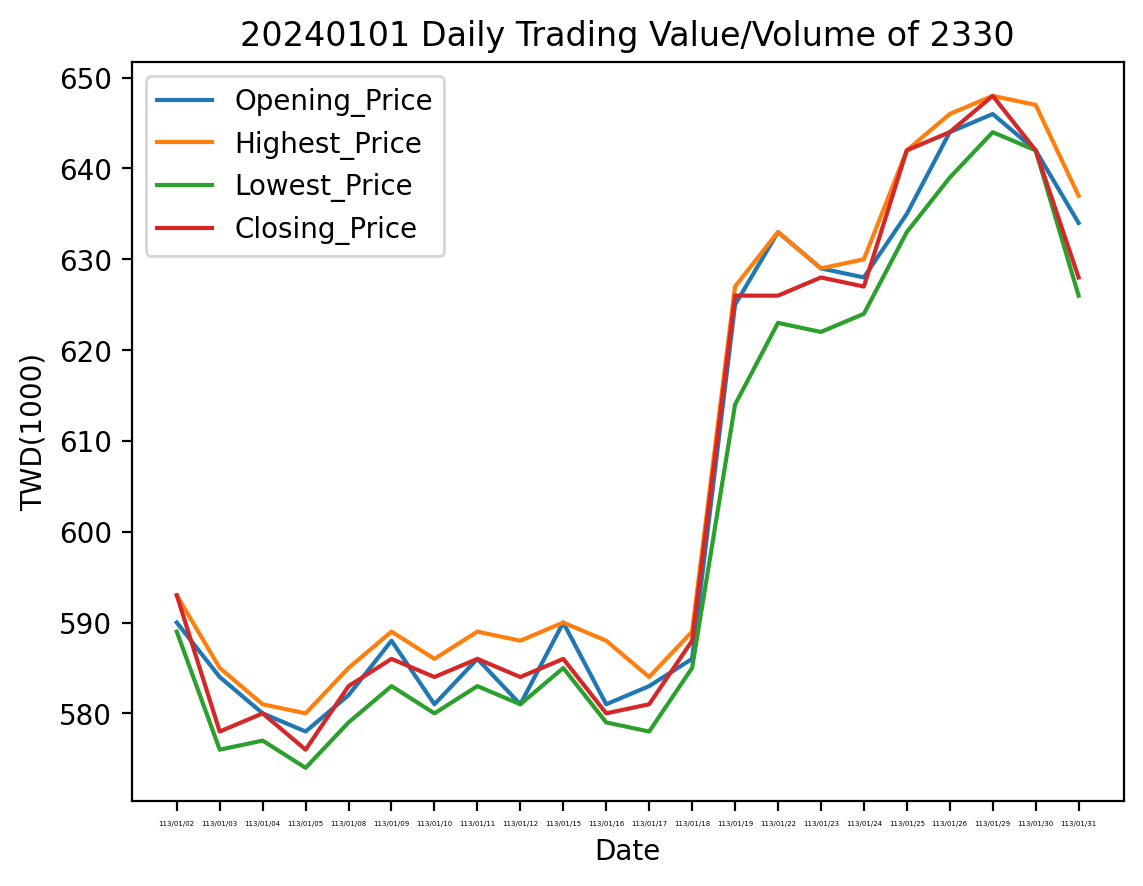

In [ ]:
date = int(input())
get_links_stock(date,2330)
df_stock.to_csv('C:/Users/think/Desktop/Result.csv',encoding="UTF-8",index=True)

20240101
start scraper 20240227
success!


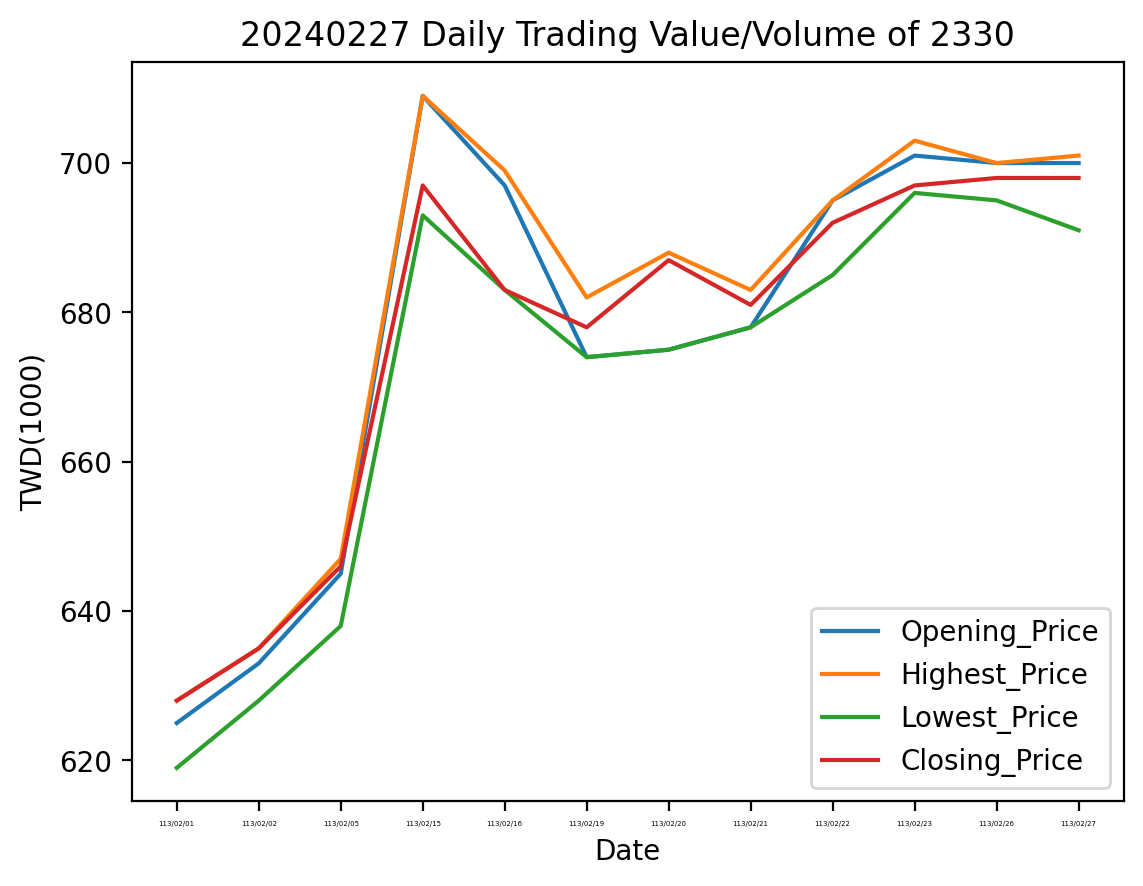

In [ ]:
import datetime
import time

today=date
print(today)

def Month_stock_scraper (stockNo=2330):
  now_date = datetime.datetime.now().strftime("%Y%m%d")
  fail_count = 0
  fail_count_Max = 3
  global today
  while today != now_date:
    print('start scraper',now_date)
    try:
      get_links_stock(int(now_date),stockNo)
      print('success!')
      fail_count = 0
      today = now_date
    except:
      print('scraper fail!')
      fail_count += 1
      if fail_count == fail_count_Max:
        raise
        break
Month_stock_scraper(2330)

In [ ]:
import csv

date=20230601
stockNo=2330
stock_url = f"https://www.twse.com.tw/exchangeReport/STOCK_DAY?response=html&date={date}&stockNo={stockNo}"
ua = UserAgent()
user_agent = ua.random
headers = {'user-agent': user_agent}
stock_scraper = requests.get(stock_url , headers=headers)
bs = BeautifulSoup(stock_scraper.text,'html.parser')
rows = bs.findAll('td')

csvFile = open(f'{date}_{stockNo}.csv','wt+',encoding="UTF-8")
writer = csv.writer(csvFile)
try:
  for row in rows:
    csvRow = []
    csvRow.append(row.text)
    writer.writerow(csvRow)
finally:
  csvFile.close()

In [ ]:
stock_url = "https://www.twse.com.tw/exchangeReport/STOCK_DAY?response=html&date=20230601&stockNo=2330"
ua = UserAgent()
user_agent = ua.random
headers = {'user-agent': user_agent}
stock_scraper = requests.get(stock_url , headers=headers)
bs = BeautifulSoup(stock_scraper.text,'html.parser')
target_text = bs.findAll('td')
col = bs.findAll('tr')[1]
col_1 = []
for x in col.text.split('\n'):
  col_1.append(x)
del col_1[0],col_1[-1]
len(col_1)

9

In [ ]:
update_stock = 0
days=7
date=20230601
stockNo=2330

In [ ]:
data = {}
n_days = 9
date = datetime.datetime.now()
fail_count = 0
allow_continuous_fail_count = 5
while len(data) < n_days:

    print('parsing', date)
    # 使用 crawPrice 爬資料
    try:
        # 抓資料
        data[date.date()] = crawl_price(date)
        print('success!')
        fail_count = 0
    except:
        # 假日爬不到
        print('fail! check the date is holiday')
        fail_count += 1
        if fail_count == allow_continuous_fail_count:
            raise
            break

    # 減一天
    date -= datetime.timedelta(days=1)
    time.sleep(10)

In [ ]:
from dateutil import rrule
# 根據使用者輸入的日期，以月為單位，重複呼叫爬取月股價的函式
def craw_stock(stock_number, start_month):
    b_month = datetime.date(*[int(x) for x in start_month.split('-')])
    now = datetime.datetime.now().strftime("%Y-%m-%d")         # 取得現在時間
    e_month = datetime.date(*[int(x) for x in now.split('-')])

    result = pd.DataFrame()
    for dt in rrule.rrule(rrule.MONTHLY, dtstart=b_month, until=e_month):
        result = pd.concat([result,craw_one_month(stock_number,dt)],ignore_index=True)
        time.sleep(2000.0/1000.0)

    return result

df = craw_stock(stock, begin_date)
df.set_index("日期", inplace=True)

In [ ]:
start_month = "2023-01-01"
import datetime
from dateutil import rrule
b_month = datetime.date(*[int(x) for x in start_month.split('-')])
now = datetime.datetime.now().strftime("%Y-%m-%d")
e_month = datetime.date(*[int(x) for x in now.split('-')])
now_date = datetime.datetime.now().strftime("%Y%m%d")
int(now_date)

20240226

In [ ]:
from io import StringIO

date = '20180131'

r = requests.post('https://www.twse.com.tw/exchangeReport/MI_INDEX?response=csv&date=' + date + '&type=ALL')

df = pd.read_csv(StringIO(r.text.replace("=", "")),
            header=["證券代號" in l for l in r.text.split("\n")].index(True)-1)

df = df.apply(lambda s: pd.to_numeric(s.astype(str).str.replace(",", "").replace("+", "1").replace("-", "-1"), errors='coerce'))

df.head()

,證券代號,證券名稱,成交股數,成交筆數,成交金額,開盤價,最高價,最低價,收盤價,漲跌(+/-),漲跌價差,最後揭示買價,最後揭示買量,最後揭示賣價,最後揭示賣量,本益比,Unnamed: 16
0,50.0,NaN,4251739,1176,359040915,84.40,85.00,84.15,84.65,1.0,0.10,84.60,21,84.65,80,0.0,NaN
1,51.0,NaN,7500,3,243040,32.39,32.39,32.39,32.39,1.0,0.09,32.39,43,32.50,5,0.0,NaN
2,52.0,NaN,4001,5,229706,57.35,57.60,57.30,57.40,1.0,0.05,57.35,1,57.90,1,0.0,NaN
3,53.0,NaN,1,1,37,NaN,NaN,NaN,NaN,NaN,0.00,37.09,50,37.35,1,0.0,NaN
4,54.0,NaN,2001,3,48904,24.44,24.44,24.44,24.44,-1.0,0.05,24.41,50,24.64,8,0.0,NaN
